In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read csv file
df = pd.read_csv('D:\Manoj\Spam-SMS-Detection\spam.csv', encoding='latin-1')
df.head(10)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Thinesh\AppData\Local\Temp\ipykernel_20764\3817608371.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\Manoj\Spam-SMS-Detection\spam.csv', encoding='latin-1')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


Data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
#check the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
#drop the null valuse
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check thee duplicate values
df.duplicated().sum()

403

In [10]:
#Remove the duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [11]:
x = df.v2
y = df.v1
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object
0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5169, dtype: object


In [12]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(y)
print(Y)

[0 0 1 ... 0 0 0]


Data Split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.20,random_state=43)

Feature Extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
tfv=TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')
x_train_v = tfv.fit_transform(x_train)
x_test_v =  tfv.transform(x_test)
print("Sparse Matrix n",x_train_v.shape,"n",x_train_v.toarray())
print("Feature Names n",tfv.get_feature_names_out())

Sparse Matrix n (4135, 7353) n [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names n ['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [ ]:
print(x_train_v)

  (0, 3856)	0.43469043194144513
  (0, 1309)	0.6572870234840292
  (0, 3977)	0.36111098954366455
  (0, 2726)	0.4986149319553723
  (1, 1555)	0.6761244207601552
  (1, 2306)	0.4682199595391287
  (1, 6391)	0.5688812153173289
  (2, 4647)	0.5478914285943614
  (2, 2233)	0.3719569527362354
  (2, 4224)	0.3320686223364733
  (2, 7000)	0.362744435711573
  (2, 2927)	0.47817904188957105
  (2, 3263)	0.30158699590901616
  (3, 101)	0.23178294486905315
  (3, 2038)	0.2216782472836205
  (3, 4528)	0.19503138172910586
  (3, 7243)	0.15296074351266364
  (3, 2009)	0.17511179625483025
  (3, 6709)	0.2109668361996226
  (3, 635)	0.24712370076284837
  (3, 6956)	0.2593003437454018
  (3, 6739)	0.1378822713537121
  (3, 7158)	0.1834494373232739
  (3, 1607)	0.15977104036103504
  (3, 364)	0.19879019321706912
  :	:
  (4130, 7059)	0.30985373378579106
  (4131, 1817)	0.6062837890524834
  (4131, 3845)	0.6931774524309547
  (4131, 6833)	0.38977555923055945
  (4132, 3188)	0.381681677870219
  (4132, 7265)	0.4120352422693271
  (4132

Spam Dection 
Developing the models
1.LogicalRegression
2.MultinomialNB
3.SVM

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from  sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

Loogical Regression

In [ ]:
lr = LogisticRegression().fit(x_train_v,y_train)
pred = lr.predict(x_test_v)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
acc = accuracy_score(y_test,pred)
print(acc*100)
ps = precision_score(y_test,pred)
print(ps)

95.35783365570599
1.0


MultinomialNB

In [ ]:
mnb = MultinomialNB().fit(x_train_v,y_train)
pred1= mnb.predict(x_test_v)
acc1= accuracy_score(y_test,pred1)
ps1 = precision_score(y_test,pred1)
print(acc1*100)
print(ps1)

96.42166344294004
1.0


SVM

In [ ]:
svc = SVC().fit(x_train_v,y_train)
pred2= svc.predict(x_test_v)
acc2= accuracy_score(y_test,pred2)
ps2 = precision_score(y_test,pred2)
print(acc2*100)
print(ps2)

97.58220502901354
0.9913793103448276


In [33]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC().fit(x_train_v,y_train)
pred4 = lsvc.predict(x_test_v)
acc4=accuracy_score(y_test,pred4)
print(acc4*100,'%')
ps3 = precision_score(y_test,pred4)
print(ps3)
cm = confusion_matrix(y_test,pred4)
print(cm)

98.54932301740811 %
0.984375
[[893   2]
 [ 13 126]]


c:\python38\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


ploting the model

In [28]:
data_frame = pd.DataFrame({'actual': y_test, 'predicted': pred4})
data_frame

,actual,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1029,0,0
1030,0,0
1031,0,0
1032,0,0


In [30]:
import seaborn as sns

Text(0.5, 1.0, 'Model Performance')

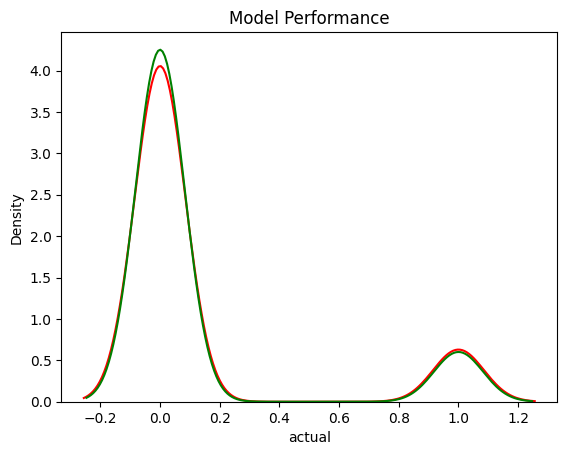

In [31]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

Model Testing

In [ ]:
with open('mytext.txt', 'w') as f1:
    f1.write(x_test.iloc[2])

In [ ]:
with open('mytext.txt','r') as f1:
    text = f1.read()

text

'my ex-wife was not able to have kids. Do you want kids one day?'

In [ ]:
vect_txt = tfv.transform([text])

In [ ]:
svc.predict(vect_txt)

array([0])

In [ ]:
y_test[2]

0

Conclusion¶
I have used Classifier models - LogicalRegression, MultinomialNB, SVM and LinearSVC for detecting the spam SMS.

The LinearSVC has performed well with the accuracy of 98.5%